In [14]:
# 以下は必要なライブラリのため、あらかじめ読み込んでおいてください。
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd
import time

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第３位まで表示
%precision 3


'%.3f'

In [15]:
# UCIのabaloneデータセットを読み込む
abalone_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
abalone_columns = [
    'Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
    'Viscera weight', 'Shell weight', 'Rings'
 ]
abalone = pd.read_csv(abalone_url, names=abalone_columns)
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


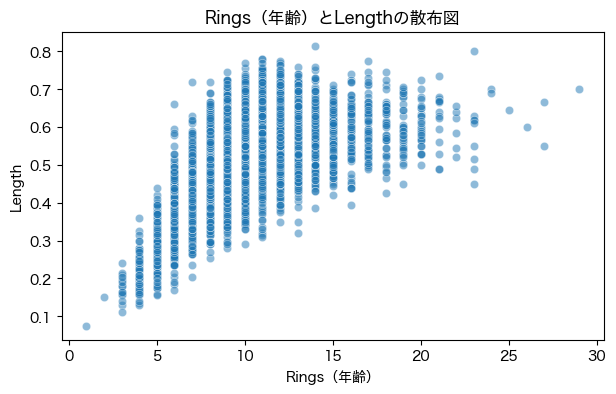

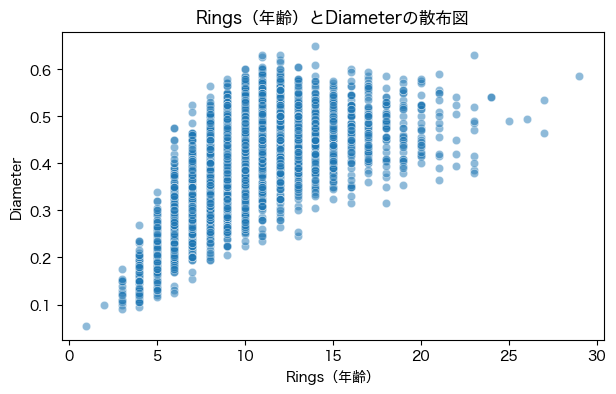

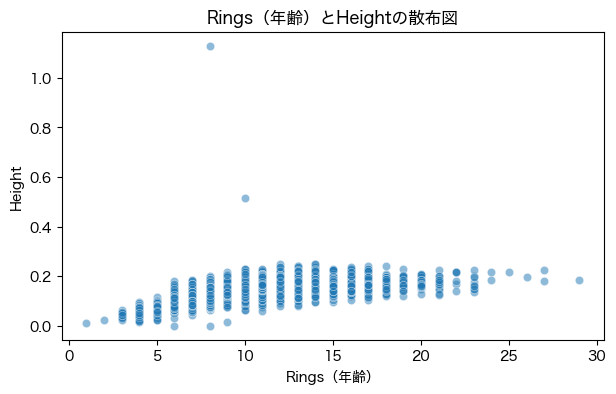

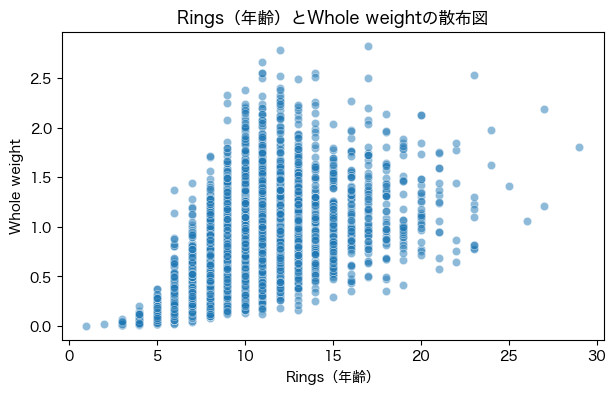

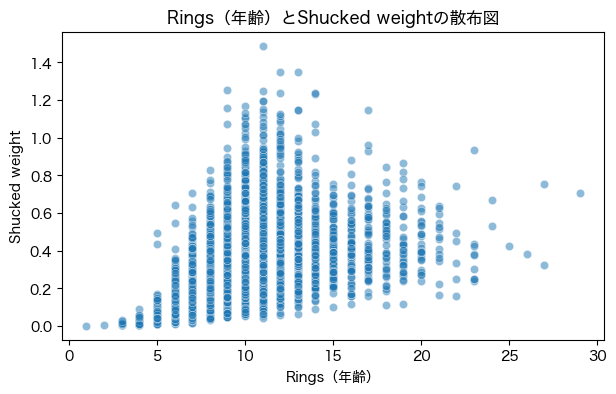

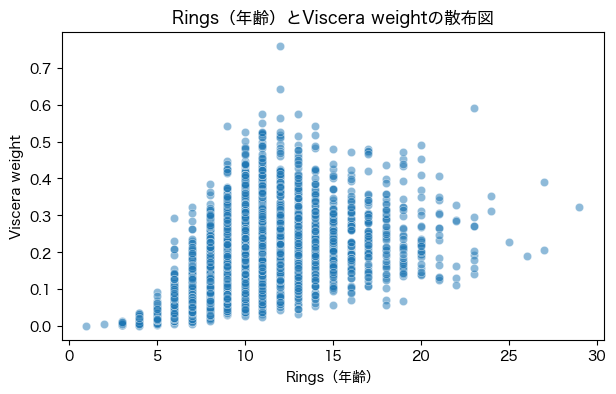

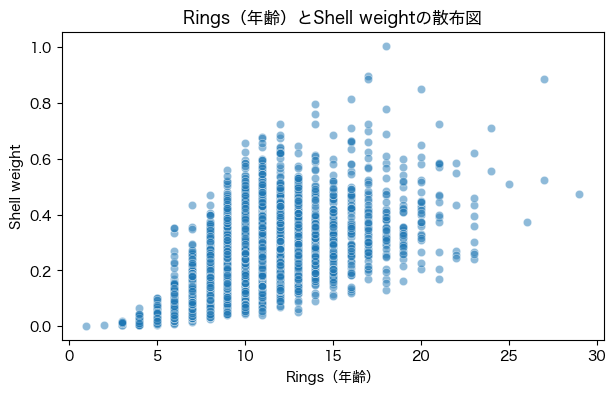

In [16]:
# matplotlibで日本語を表示するための設定
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Hiragino Sans'  # macOSの日本語対応フォント
plt.rcParams['axes.unicode_minus'] = False  # マイナス記号も正しく表示

# 年齢（Rings）に対する各特徴量の散布図を表示
num_cols = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(7, 4))
    sns.scatterplot(x='Rings', y=col, data=abalone, alpha=0.5)
    plt.title(f'Rings（年齢）と{col}の散布図')
    plt.xlabel('Rings（年齢）')
    plt.ylabel(col)
    plt.show()

In [17]:
# Sex列をone-hot encoding
abalone_encoded = pd.get_dummies(abalone, columns=['Sex'])
abalone_encoded.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,False,True,False


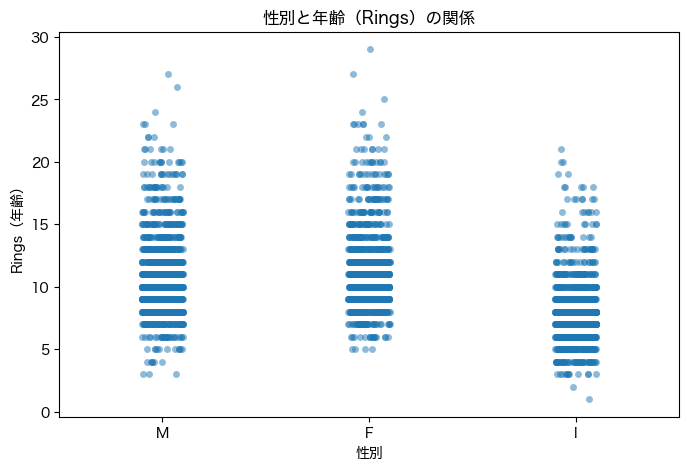

In [18]:
# 性別と年齢（Rings）の関係を散布図で可視化
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.stripplot(x='Sex', y='Rings', data=abalone, jitter=True, alpha=0.5)
plt.title('性別と年齢（Rings）の関係')
plt.xlabel('性別')
plt.ylabel('Rings（年齢）')
plt.show()

In [19]:
# abaloneデータセットの各特徴量の欠損値数を確認
print(abalone.isnull().sum())

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


In [20]:
# 数値特徴量のみ標準化（平均0, 標準偏差1）
from sklearn.preprocessing import StandardScaler

# one-hot encoding済みデータを使う
abalone_encoded = pd.get_dummies(abalone, columns=['Sex'])

# 標準化するカラム名（数値特徴量）
num_cols = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

scaler = StandardScaler()
abalone_encoded[num_cols] = scaler.fit_transform(abalone_encoded[num_cols])

abalone_encoded.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,15,False,False,True
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,7,False,False,True
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,9,True,False,False
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,10,False,False,True
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,7,False,True,False


In [26]:
# 線形回帰による年齢（Rings）予測
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 説明変数と目的変数に分割
X = abalone_encoded.drop('Rings', axis=1)
y = abalone_encoded['Rings']

# 学習用・テスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 線形回帰モデルの学習
lr = LinearRegression()
lr.fit(X_train, y_train)

# 予測
y_pred = lr.predict(X_test)

# 評価指標の計算
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('【線形回帰モデルの評価】')
print('平均二乗誤差（MSE）:', mse)
print('決定係数（R2）:', r2)

【線形回帰モデルの評価】
平均二乗誤差（MSE）: 5.006878548779927
決定係数（R2）: 0.5389746671340974


In [24]:
# ランダムフォレスト回帰による年齢（Rings）予測
from sklearn.ensemble import RandomForestRegressor

# モデルの作成と学習
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

# 予測
y_pred_rf = rf.predict(X_test)

# 評価指標の計算
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('【ランダムフォレスト回帰】')
print('平均二乗誤差（MSE）:', mse_rf)
print('決定係数（R2）:', r2_rf)

# 四捨五入して正解率も計算
accuracy_rf = (y_test == np.round(y_pred_rf)).mean()
print('正解率:', accuracy_rf)

【ランダムフォレスト回帰】
平均二乗誤差（MSE）: 4.686115191387561
決定係数（R2）: 0.5685100417536865
正解率: 0.23086124401913877


In [25]:
# 勾配ブースティング回帰による年齢（Rings）予測
from sklearn.ensemble import GradientBoostingRegressor

# モデルの作成と学習
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)

# 予測
y_pred_gbr = gbr.predict(X_test)

# 評価指標の計算
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print('【勾配ブースティング回帰】')
print('平均二乗誤差（MSE）:', mse_gbr)
print('決定係数（R2）:', r2_gbr)

# 四捨五入して正解率も計算
accuracy_gbr = (y_test == np.round(y_pred_gbr)).mean()
print('正解率:', accuracy_gbr)

【勾配ブースティング回帰】
平均二乗誤差（MSE）: 4.7625330342471495
決定係数（R2）: 0.5614736095538638
正解率: 0.25239234449760767
